In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from q1 import MLP, MLP2, MLP3, CNN1, CNN2, train, predict

preparing data

In [2]:
train_set = datasets.CIFAR10(root='./data/', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), 
                                                                                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_set_ = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), 
                                                                                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

n_train = len(train_set)
batch_size = 32
split = n_train // 5
indices = np.random.permutation(n_train)
subset_sampler = torch.utils.data.sampler.SubsetRandomSampler(indices[:split])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=subset_sampler)
n_test = len(test_set_)
val_set, test_set = torch.utils.data.random_split(test_set_, [n_test//2, n_test//2])
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


training settings

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = train_set.data[0].reshape((-1, 1)).shape[0]

MLP

In [4]:
model = MLP(input_size, 512)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_512, train_accuracies_512, val_losses_512, val_accuracies_512 = train(model, optimizer, criterion, train_loader, val_loader, 5)

Train Epoch: 1, Loss: 657.786092, Accuracy: 0.047840
Training time for this epoch 2.731273
Val Epoch:   1, Loss: 306.594445, Accuracy: 0.304000
Train Epoch: 2, Loss: 596.094690, Accuracy: 0.065880
Training time for this epoch 2.561934
Val Epoch:   2, Loss: 292.138538, Accuracy: 0.334400
Train Epoch: 3, Loss: 571.130498, Accuracy: 0.071300
Training time for this epoch 2.383352
Val Epoch:   3, Loss: 282.667473, Accuracy: 0.368200
Train Epoch: 4, Loss: 553.870783, Accuracy: 0.074820
Training time for this epoch 2.367162
Val Epoch:   4, Loss: 276.608985, Accuracy: 0.375400
Train Epoch: 5, Loss: 541.305763, Accuracy: 0.078360
Training time for this epoch 2.566556
Val Epoch:   5, Loss: 272.262667, Accuracy: 0.387600


In [5]:
model = MLP(input_size, 1024)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_1024, train_accuracies_1024, val_losses_1024, val_accuracies_1024 = train(model, optimizer, criterion, train_loader, val_loader, 5)

Train Epoch: 1, Loss: 638.984103, Accuracy: 0.052220
Training time for this epoch 2.603880
Val Epoch:   1, Loss: 296.175879, Accuracy: 0.341000
Train Epoch: 2, Loss: 579.480205, Accuracy: 0.068700
Training time for this epoch 2.549602
Val Epoch:   2, Loss: 284.078225, Accuracy: 0.358800
Train Epoch: 3, Loss: 556.666887, Accuracy: 0.073140
Training time for this epoch 2.707362
Val Epoch:   3, Loss: 276.572557, Accuracy: 0.374800
Train Epoch: 4, Loss: 540.198746, Accuracy: 0.078780
Training time for this epoch 2.596871
Val Epoch:   4, Loss: 272.436556, Accuracy: 0.387200
Train Epoch: 5, Loss: 527.528214, Accuracy: 0.082600
Training time for this epoch 2.533604
Val Epoch:   5, Loss: 266.798678, Accuracy: 0.400600


In [6]:
model = MLP2(input_size=input_size)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_1024_2, train_accuracies_1024_2, val_losses_1024_2, val_accuracies_1024_2 = train(model, optimizer, criterion, train_loader, val_loader, 5)

Train Epoch: 1, Loss: 642.721077, Accuracy: 0.053100
Training time for this epoch 2.620622
Val Epoch:   1, Loss: 300.907721, Accuracy: 0.301000
Train Epoch: 2, Loss: 584.558169, Accuracy: 0.068360
Training time for this epoch 2.621898
Val Epoch:   2, Loss: 286.337524, Accuracy: 0.355200
Train Epoch: 3, Loss: 560.879656, Accuracy: 0.072700
Training time for this epoch 2.526241
Val Epoch:   3, Loss: 278.842674, Accuracy: 0.374000
Train Epoch: 4, Loss: 543.873456, Accuracy: 0.077680
Training time for this epoch 2.587603
Val Epoch:   4, Loss: 272.270303, Accuracy: 0.385200
Train Epoch: 5, Loss: 530.534478, Accuracy: 0.081220
Training time for this epoch 2.622907
Val Epoch:   5, Loss: 269.685188, Accuracy: 0.401800


In [7]:
model = MLP3(input_size=input_size)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_512_2, train_accuracies_512_2, val_losses_512_2, val_accuracies_512_2 = train(model, optimizer, criterion, train_loader, val_loader, 5)

Train Epoch: 1, Loss: 669.984478, Accuracy: 0.037960
Training time for this epoch 2.779093
Val Epoch:   1, Loss: 313.194843, Accuracy: 0.248600
Train Epoch: 2, Loss: 608.505177, Accuracy: 0.056780
Training time for this epoch 2.846051
Val Epoch:   2, Loss: 297.631051, Accuracy: 0.311400
Train Epoch: 3, Loss: 586.500870, Accuracy: 0.064200
Training time for this epoch 2.951449
Val Epoch:   3, Loss: 293.408062, Accuracy: 0.326000
Train Epoch: 4, Loss: 570.185707, Accuracy: 0.068120
Training time for this epoch 2.776782
Val Epoch:   4, Loss: 282.934519, Accuracy: 0.348200
Train Epoch: 5, Loss: 554.266447, Accuracy: 0.071840
Training time for this epoch 2.838201
Val Epoch:   5, Loss: 277.950630, Accuracy: 0.360800


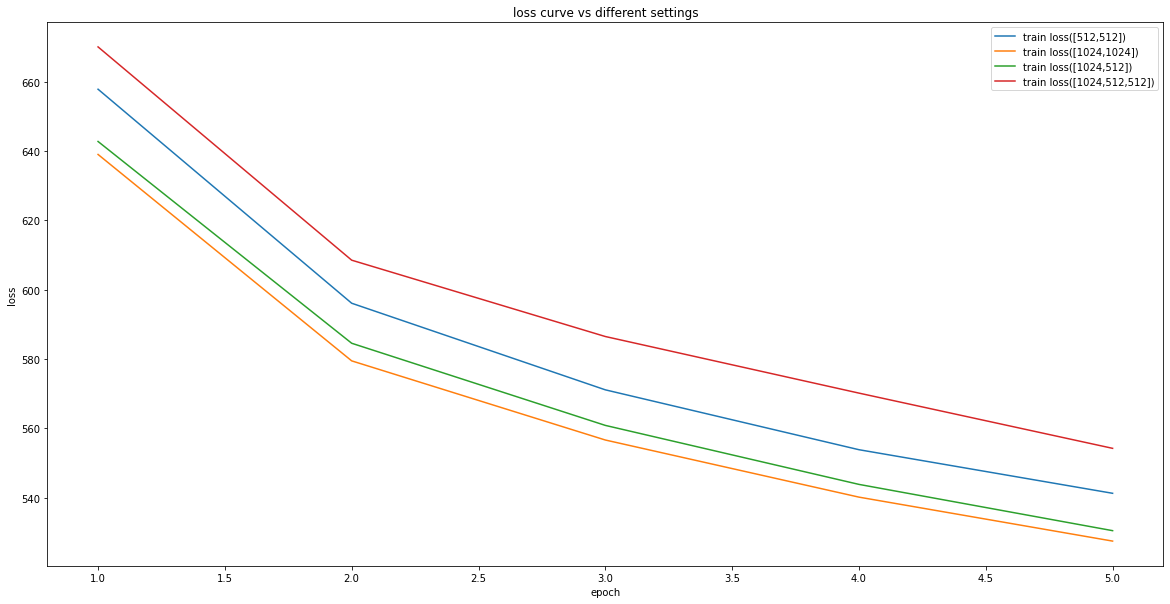

In [8]:
plt.figure(figsize=(20,10))
plt.title('loss curve vs different settings')
plt.plot([i+1 for i in range(5)], train_losses_512)
plt.plot([i+1 for i in range(5)], train_losses_1024)
plt.plot([i+1 for i in range(5)], train_losses_1024_2)
plt.plot([i+1 for i in range(5)], train_losses_512_2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss([512,512])', 'train loss([1024,1024])', 'train loss([1024,512])', 'train loss([1024,512,512])'])
plt.show()

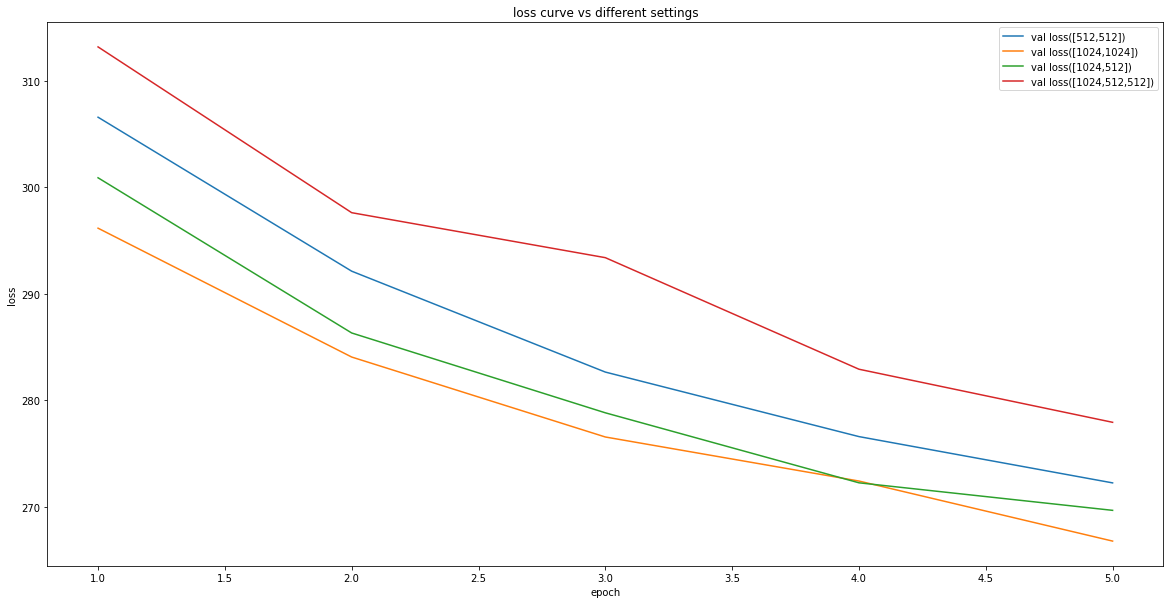

In [9]:
plt.figure(figsize=(20,10))
plt.title('loss curve vs different settings')
plt.plot([i+1 for i in range(5)], val_losses_512)
plt.plot([i+1 for i in range(5)], val_losses_1024)
plt.plot([i+1 for i in range(5)], val_losses_1024_2)
plt.plot([i+1 for i in range(5)], val_losses_512_2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['val loss([512,512])', 'val loss([1024,1024])', 'val loss([1024,512])', 'val loss([1024,512,512])'])
plt.show()

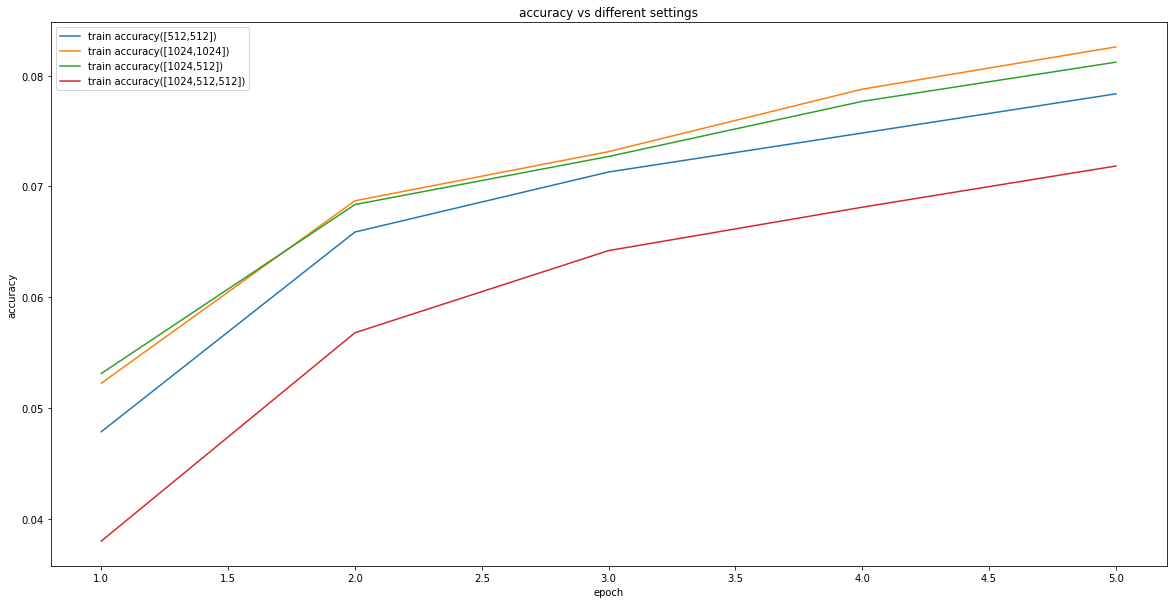

In [10]:
plt.figure(figsize=(20,10))
plt.title('accuracy vs different settings')
plt.plot([i+1 for i in range(5)], train_accuracies_512)
plt.plot([i+1 for i in range(5)], train_accuracies_1024)
plt.plot([i+1 for i in range(5)], train_accuracies_1024_2)
plt.plot([i+1 for i in range(5)], train_accuracies_512_2)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy([512,512])', 'train accuracy([1024,1024])', 'train accuracy([1024,512])', 'train accuracy([1024,512,512])'])
plt.show()

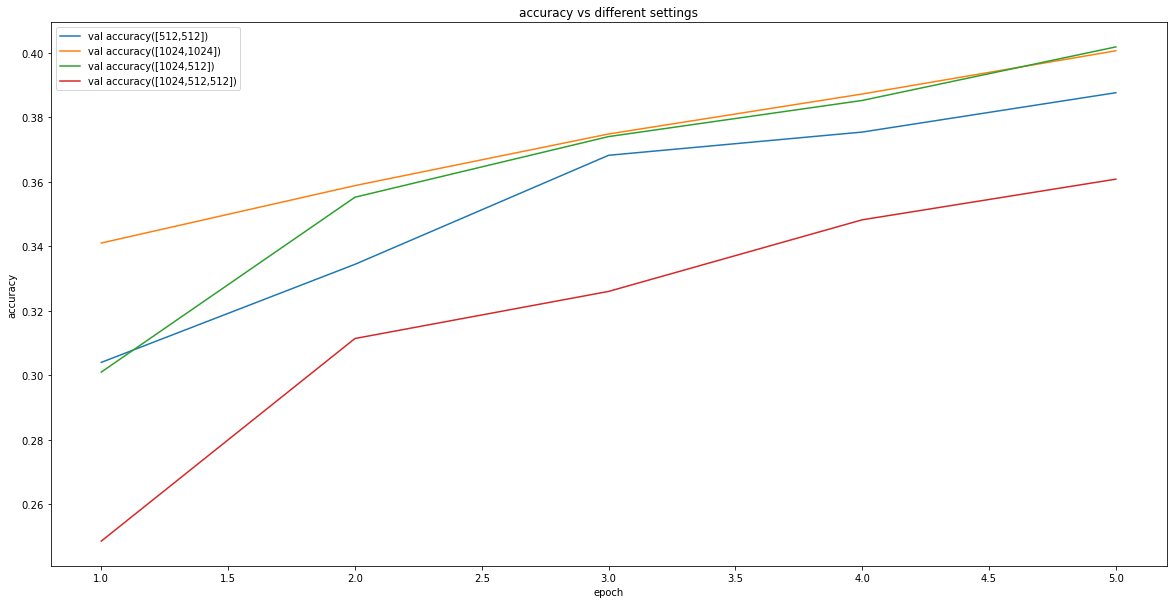

In [11]:
plt.figure(figsize=(20,10))
plt.title('accuracy vs different settings')
plt.plot([i+1 for i in range(5)], val_accuracies_512)
plt.plot([i+1 for i in range(5)], val_accuracies_1024)
plt.plot([i+1 for i in range(5)], val_accuracies_1024_2)
plt.plot([i+1 for i in range(5)], val_accuracies_512_2)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['val accuracy([512,512])', 'val accuracy([1024,1024])', 'val accuracy([1024,512])', 'val accuracy([1024,512,512])'])
plt.show()

MLP Test Accuracy

In [12]:
model = MLP(input_size, 512)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_512, train_accuracies_512, val_losses_512, val_accuracies_512 = train(model, optimizer, criterion, train_loader, val_loader, 5)
predict(model, criterion, test_loader)

Train Epoch: 1, Loss: 656.185899, Accuracy: 0.048500
Training time for this epoch 2.578060
Val Epoch:   1, Loss: 306.376327, Accuracy: 0.296200
Train Epoch: 2, Loss: 595.914982, Accuracy: 0.065360
Training time for this epoch 2.336225
Val Epoch:   2, Loss: 290.511720, Accuracy: 0.349400
Train Epoch: 3, Loss: 572.674638, Accuracy: 0.070480
Training time for this epoch 2.374568
Val Epoch:   3, Loss: 283.390067, Accuracy: 0.363400
Train Epoch: 4, Loss: 555.687972, Accuracy: 0.074740
Training time for this epoch 2.574543
Val Epoch:   4, Loss: 276.509686, Accuracy: 0.372000
Train Epoch: 5, Loss: 542.361653, Accuracy: 0.078420
Training time for this epoch 2.450150
Val Epoch:   5, Loss: 272.892415, Accuracy: 0.383600
Test Loss: 275.899717, Test Accuracy: 0.379600


CNN1

In [13]:
model = CNN1()
model = model.to(device)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_cnn1, train_accuracies_cnn1,  val_losses_cnn1, val_accuracies_cnn1 = train(model, optimizer, criterion, train_loader, val_loader)

Train Epoch: 1, Loss: 614.232278, Accuracy: 0.060800
Training time for this epoch 9.265019
Val Epoch:   1, Loss: 267.768316, Accuracy: 0.415400
Train Epoch: 2, Loss: 502.943871, Accuracy: 0.086480
Training time for this epoch 7.938088
Val Epoch:   2, Loss: 237.820669, Accuracy: 0.461200
Train Epoch: 3, Loss: 446.964458, Accuracy: 0.098980
Training time for this epoch 7.616301
Val Epoch:   3, Loss: 224.504528, Accuracy: 0.498800
Train Epoch: 4, Loss: 403.131371, Accuracy: 0.110140
Training time for this epoch 7.853673
Val Epoch:   4, Loss: 212.363244, Accuracy: 0.509600
Train Epoch: 5, Loss: 368.236544, Accuracy: 0.118000
Training time for this epoch 7.713828
Val Epoch:   5, Loss: 204.902707, Accuracy: 0.534000


In [14]:
predict(model, criterion, test_loader)

Test Loss: 208.262635, Test Accuracy: 0.513800


CNN2

In [15]:
model = CNN2()
model = model.to(device)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_cnn2, train_accuracies_cnn2,  val_losses_cnn2, val_accuracies_cnn2 = train(model, optimizer, criterion, train_loader, val_loader)

Train Epoch: 1, Loss: 665.115846, Accuracy: 0.043100
Training time for this epoch 3.637395
Val Epoch:   1, Loss: 305.937669, Accuracy: 0.295800
Train Epoch: 2, Loss: 586.617296, Accuracy: 0.065220
Training time for this epoch 3.578873
Val Epoch:   2, Loss: 279.103233, Accuracy: 0.367000
Train Epoch: 3, Loss: 537.785300, Accuracy: 0.076960
Training time for this epoch 3.760948
Val Epoch:   3, Loss: 257.594948, Accuracy: 0.417800
Train Epoch: 4, Loss: 501.707883, Accuracy: 0.084080
Training time for this epoch 3.577172
Val Epoch:   4, Loss: 243.195654, Accuracy: 0.436400
Train Epoch: 5, Loss: 475.218627, Accuracy: 0.089480
Training time for this epoch 3.678335
Val Epoch:   5, Loss: 234.316560, Accuracy: 0.456400


In [16]:
predict(model, criterion, test_loader)

Test Loss: 234.413591, Test Accuracy: 0.455200


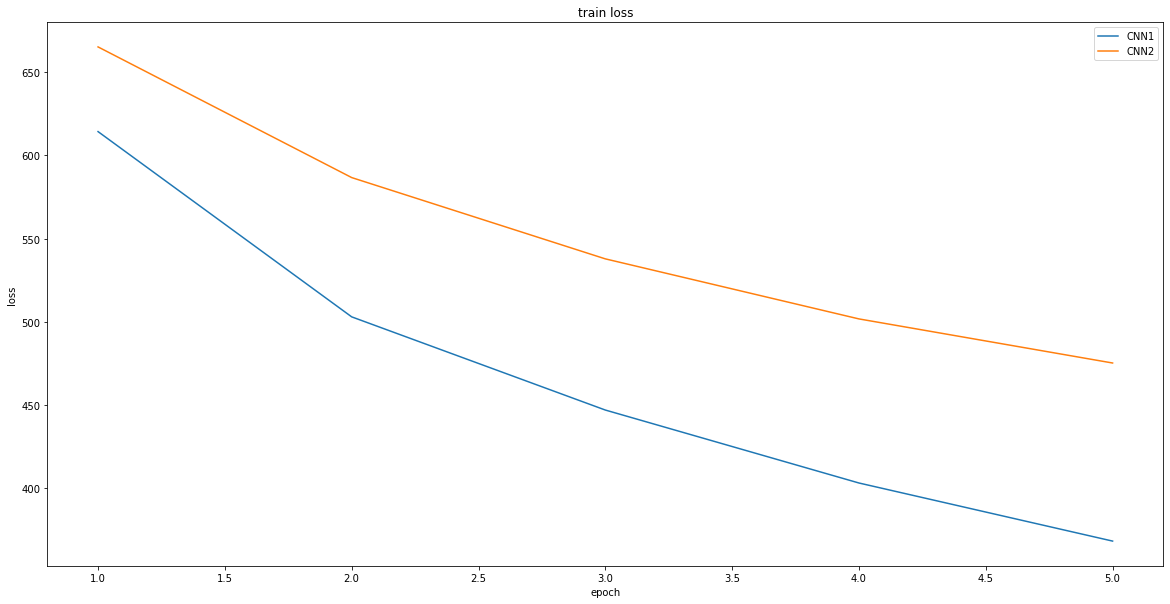

In [17]:
plt.figure(figsize=(20,10))
plt.title('train loss')
plt.plot([i+1 for i in range(5)], train_losses_cnn1)
plt.plot([i+1 for i in range(5)], train_losses_cnn2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['CNN1', 'CNN2'])
plt.show()

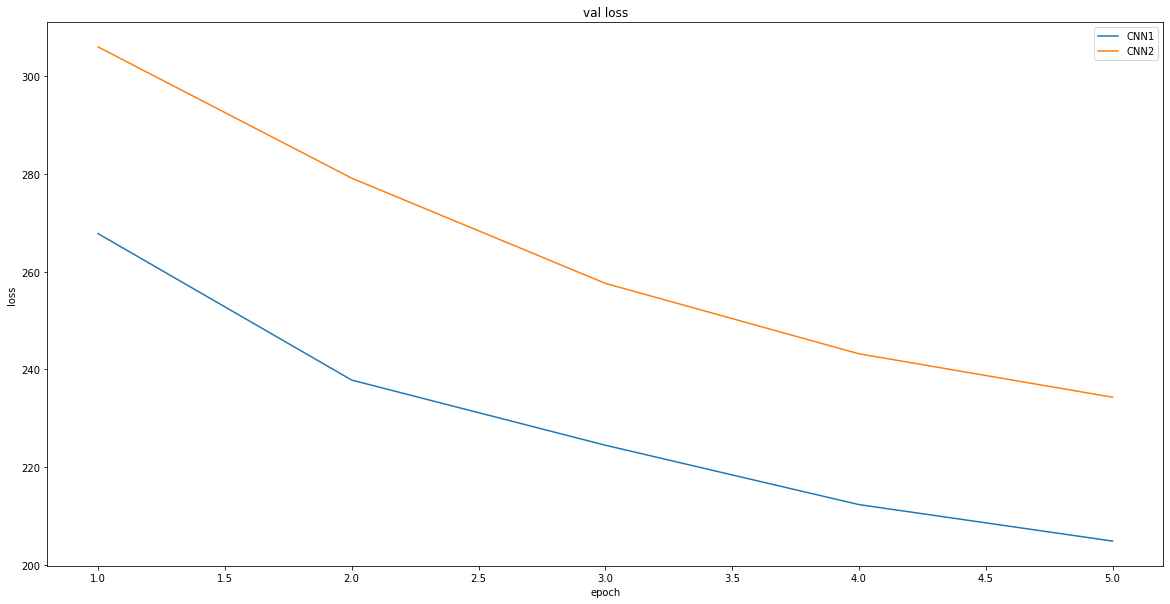

In [18]:
plt.figure(figsize=(20,10))
plt.title('val loss')
plt.plot([i+1 for i in range(5)], val_losses_cnn1)
plt.plot([i+1 for i in range(5)], val_losses_cnn2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['CNN1', 'CNN2'])
plt.show()